In [33]:
import numpy as np
import torch

from train import TrainerDeepSVDD
from preprocess import get_mnist

In [34]:
%cd /workspace

/workspace


In [35]:
class Args:

    num_epochs=150
    num_epochs_ae=150
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=32
    normal_class=1
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_mnist(args)

deep_SVDD = TrainerDeepSVDD(args, data, device)

if args.pretrain:
    deep_SVDD.pretrain()

6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 0, Loss: 160.687
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 1, Loss: 118.922
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 2, Loss: 85.630
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 3, Loss: 62.151
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 4, Loss: 46.533
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 5, Loss: 36.028
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 6, Loss: 28.815
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 7, Loss: 23.667
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 8, Loss: 19.928
6742/6742: [=======================

In [36]:
deep_SVDD.train()

6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 0, Loss: 0.739
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 1, Loss: 0.198
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 2, Loss: 0.053
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 3, Loss: 0.031
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 4, Loss: 0.024
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 5, Loss: 0.020
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 6, Loss: 0.018
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 7, Loss: 0.016
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 8, Loss: 0.014
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 9, Lo

In [37]:
from test import eval

labels, scores = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)

Testing...
ROC AUC score: 99.33


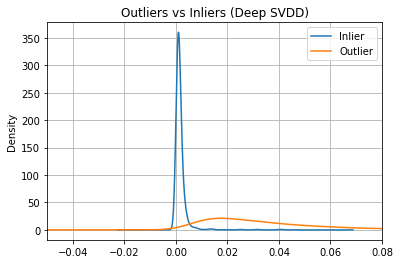

In [38]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()